In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\HP\Downloads\vgsales.csv")


In [4]:
df.shape

(16598, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [18]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
print(df[

In [10]:
df.sort_values(by='Global_Sales', ascending=False).head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [11]:
df.duplicated().sum()

np.int64(0)

##***Uni-Variate Analysis***

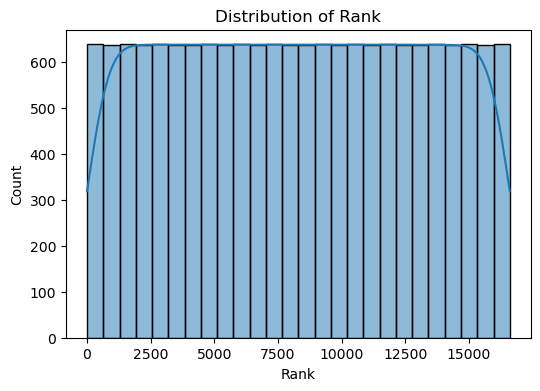

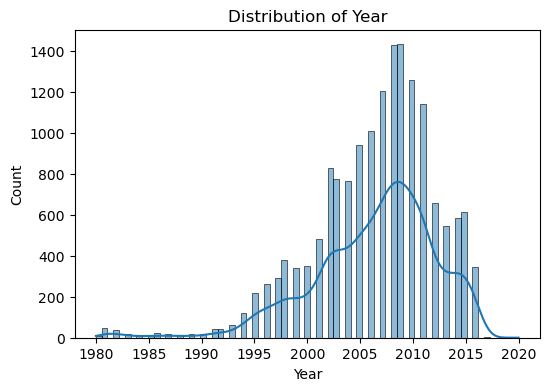

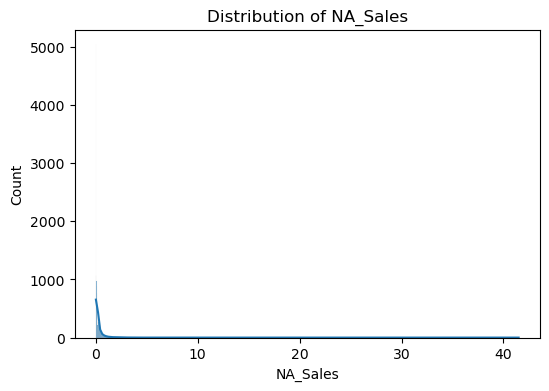

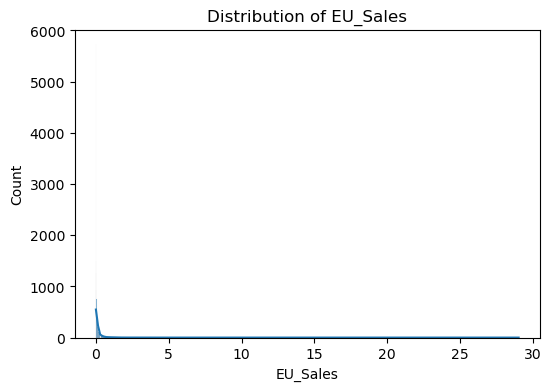

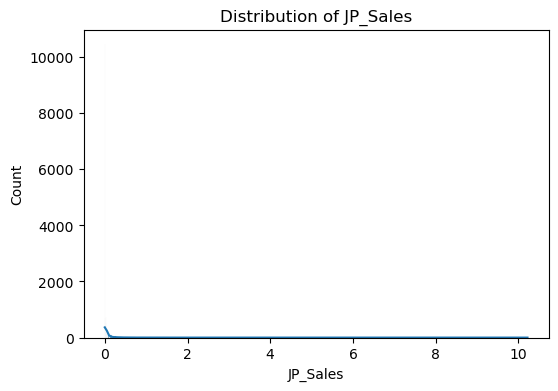

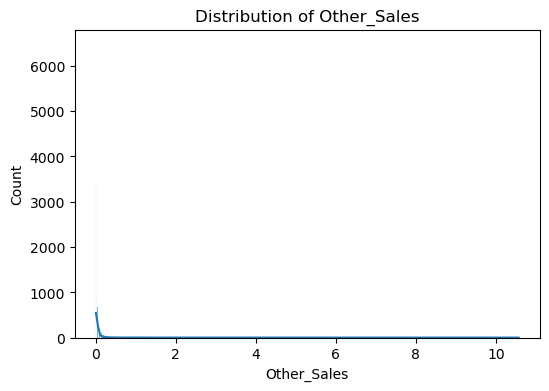

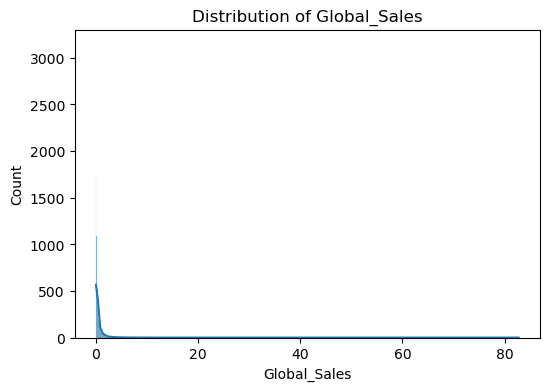

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


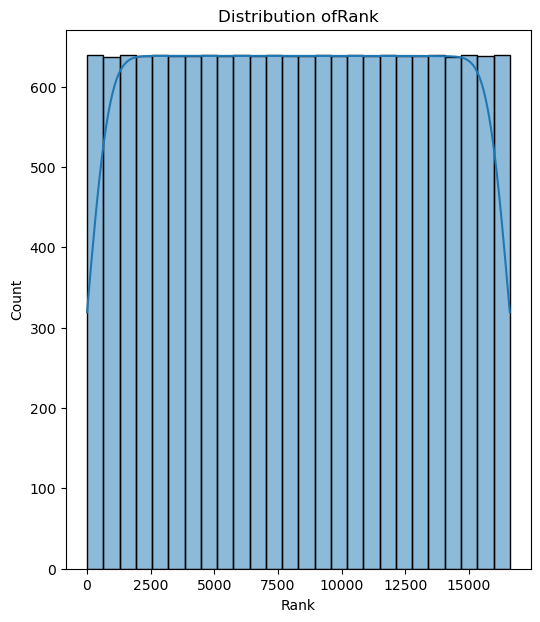

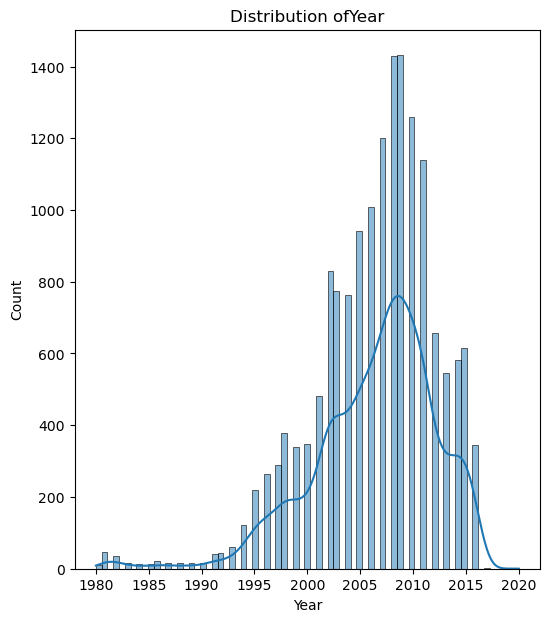

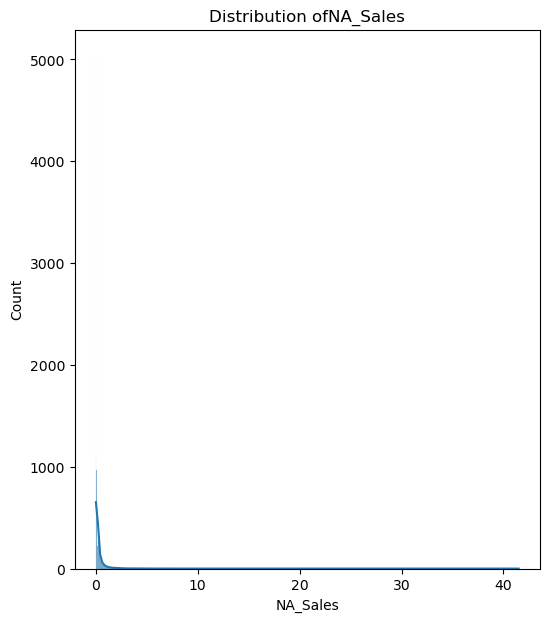

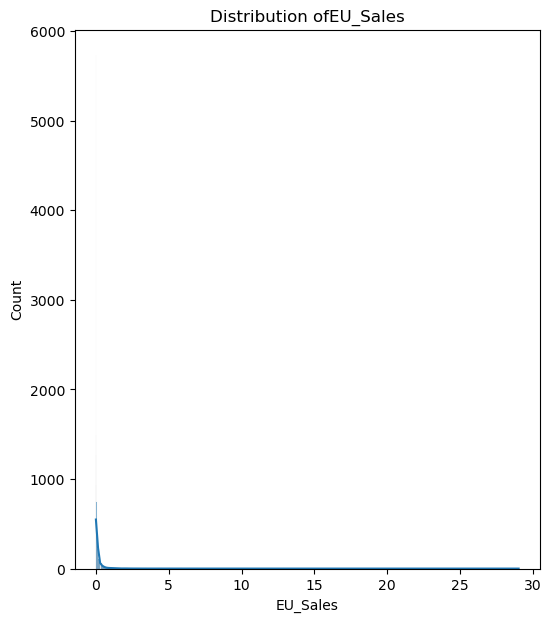

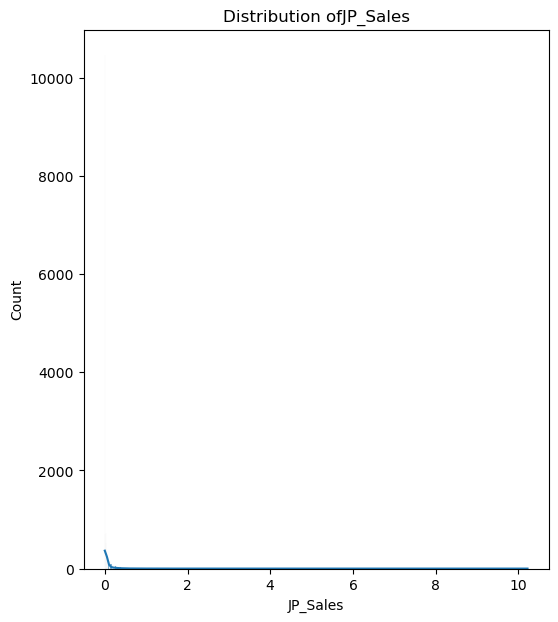

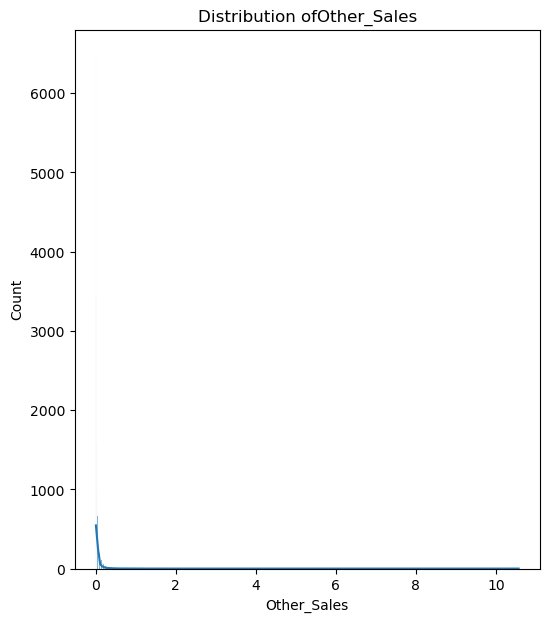

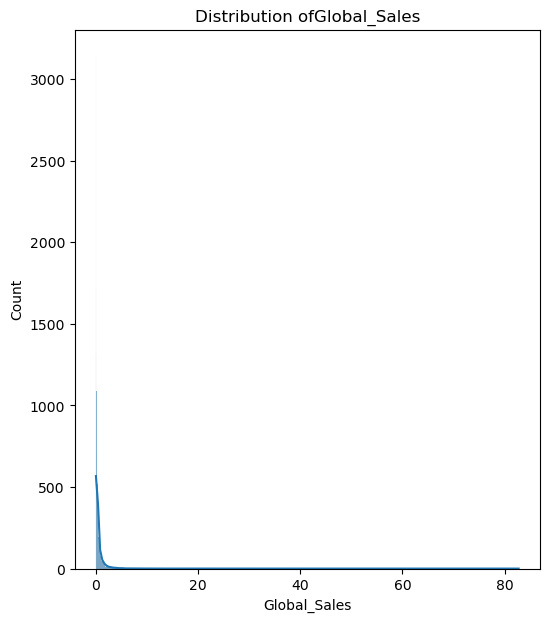

In [25]:
#Distribution of sales 

nums_cols=['Rank','Year','NA_Sales','EU_Sales','JP_Sales','other_Sales','Global Sales']

for col in num_cols:
    plt.figure(figsize=(6,7))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of{col}')
    plt.show()
    
               


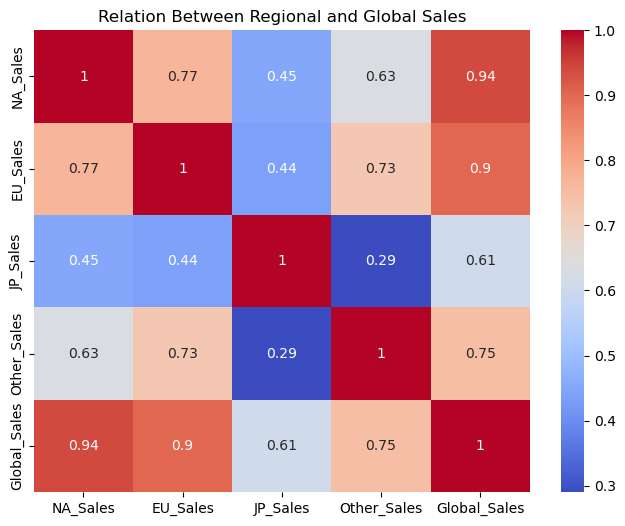

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

plt.figure(figsize=(8,6))
sns.heatmap(df[sales_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Relation Between Regional and Global Sales")
plt.show()


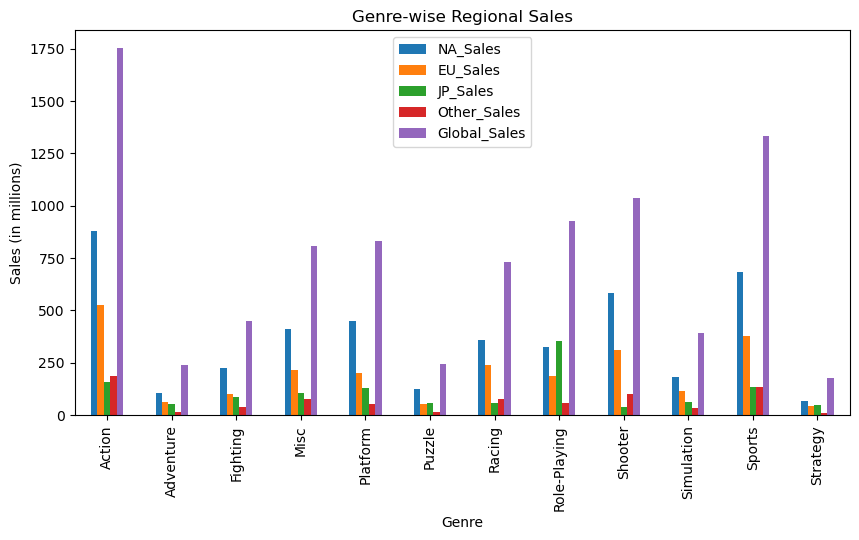

In [29]:
#How does genre impact global sales across regions?

genre_region_sales=df.groupby('Genre')[sales_cols].sum()
genre_region_sales.plot(kind='bar', figsize=(10,5))
plt.title("Genre-wise Regional Sales")
plt.ylabel("Sales (in millions)")
plt.show()

In [ ]:
# Q. Is global sales influenced by release year?

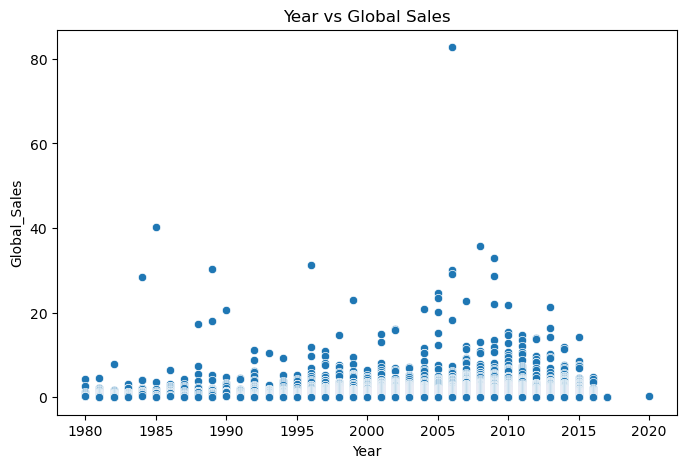

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Year', y='Global_Sales')
plt.title("Year vs Global Sales")
plt.show()


In [ ]:
##How do publishers influence sales across genres?

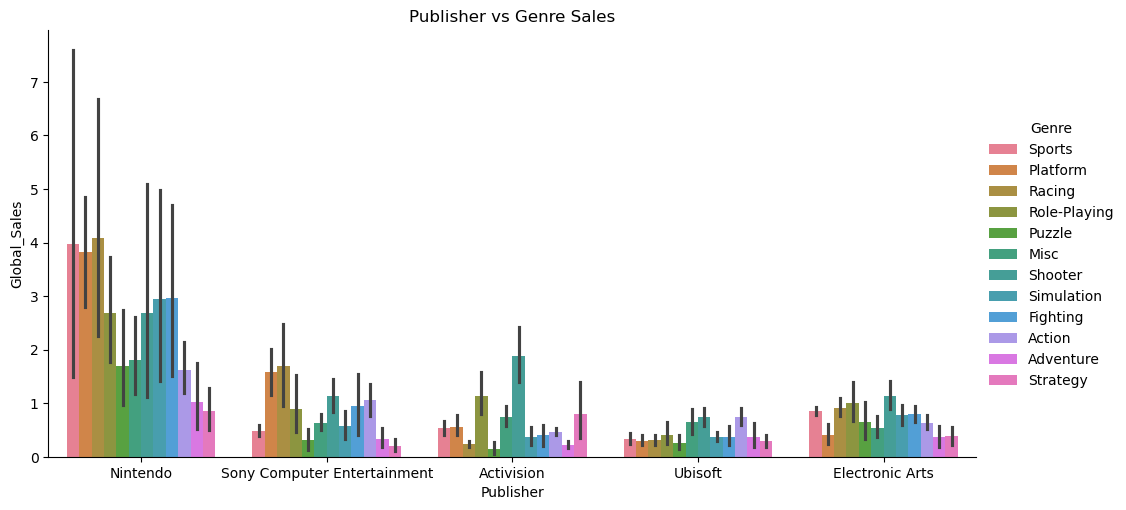

In [33]:

top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5).index
publisher_genre = df[df['Publisher'].isin(top_publishers)]

sns.catplot(
    data=publisher_genre,
    x='Publisher',
    y='Global_Sales',
    hue='Genre',
    kind='bar',
    height=5,
    aspect=2
)
plt.title("Publisher vs Genre Sales")
plt.show()


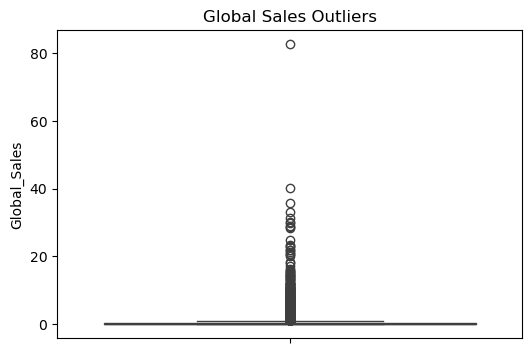

In [34]:
#outlier detection 
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Global_Sales'])
plt.title("Global Sales Outliers")
plt.show()


In [ ]:
#Conclusion:
-Multivariate analysis reveals strong interdependence between regional and global sales. 
-Genre and platform significantly influence sales patterns, with Nintendo excelling in Japan and PlayStation dominating Western markets. 
-Publisher strategies and release periods play a crucial role in determining commercial success.